In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [2]:
course_dict      = pd.read_parquet("../data/dicoding_course_dictionary.gzip")
course_level     = pd.read_parquet("../data/dicoding_course_difficulty_levels.gzip")
course_lp        = pd.read_parquet("../data/dicoding_course_learning_path.gzip")
course_user_item = pd.read_parquet("../data/dicoding_user_item_rating.gzip")

In [3]:
course_user_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303956 entries, 0 to 303955
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       303956 non-null  int64         
 1   course_id     303956 non-null  int64         
 2   graduated_at  303956 non-null  datetime64[ns]
 3   rating        303956 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 9.3 MB


In [4]:
course_user_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303956 entries, 0 to 303955
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       303956 non-null  int64         
 1   course_id     303956 non-null  int64         
 2   graduated_at  303956 non-null  datetime64[ns]
 3   rating        303956 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 9.3 MB


In [5]:
course_dict = course_dict[["course_id","name","tag"]]
course_dict = course_dict.drop_duplicates()
course_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 5129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   course_id  78 non-null     int64 
 1   name       78 non-null     object
 2   tag        78 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [6]:
data = course_user_item.merge(course_dict, on = "course_id", how = "inner").copy()

In [7]:
data_complete = data.merge(course_lp, on = "course_id", how = "inner")

In [8]:
data_complete.rename(
    columns={
        "name_x":"course_name",
        "name_y":"learning_path",
    },
    inplace= True
)

In [9]:
data_complete

,user_id,course_id,graduated_at,rating,course_name,tag,learning_path_id,learning_path
0,623699,14,2020-03-10 11:45:50,5,Belajar Fundamental Aplikasi Android,android,7,Android Developer
1,406371,14,2020-03-10 08:44:09,4,Belajar Fundamental Aplikasi Android,android,7,Android Developer
2,1946,14,2020-03-11 13:24:10,5,Belajar Fundamental Aplikasi Android,android,7,Android Developer
3,186713,14,2020-03-11 17:36:04,4,Belajar Fundamental Aplikasi Android,android,7,Android Developer
4,462580,14,2020-03-11 08:43:36,4,Belajar Fundamental Aplikasi Android,android,7,Android Developer
...,...,...,...,...,...,...,...,...
364803,2688780,565,2023-08-14 01:01:09,5,Belajar Tools Front-End Web Intermediate,"css,front-end,web,javascript",22,Front-End Web Developer
364804,50101,565,2023-08-16 22:04:26,5,Belajar Tools Front-End Web Intermediate,"css,front-end,web,javascript",22,Front-End Web Developer
364805,446303,565,2023-08-20 02:04:33,4,Belajar Tools Front-End Web Intermediate,"css,front-end,web,javascript",22,Front-End Web Developer
364806,2413375,565,2023-08-20 22:25:03,5,Belajar Tools Front-End Web Intermediate,"css,front-end,web,javascript",22,Front-End Web Developer


simple eda

<Axes: xlabel='rating', ylabel='count'>

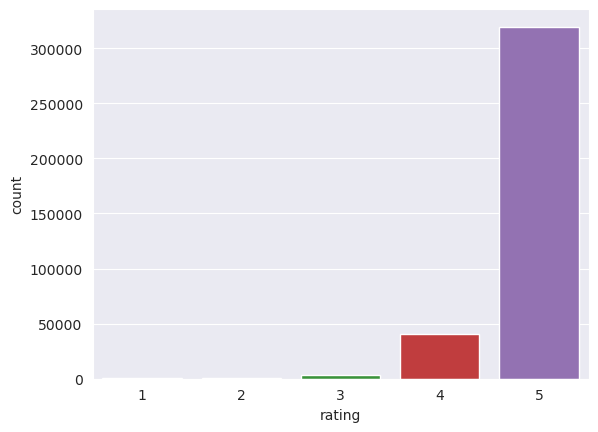

In [10]:
sns.countplot(data = data_complete, x = "rating")

<Axes: xlabel='count', ylabel='learning_path'>

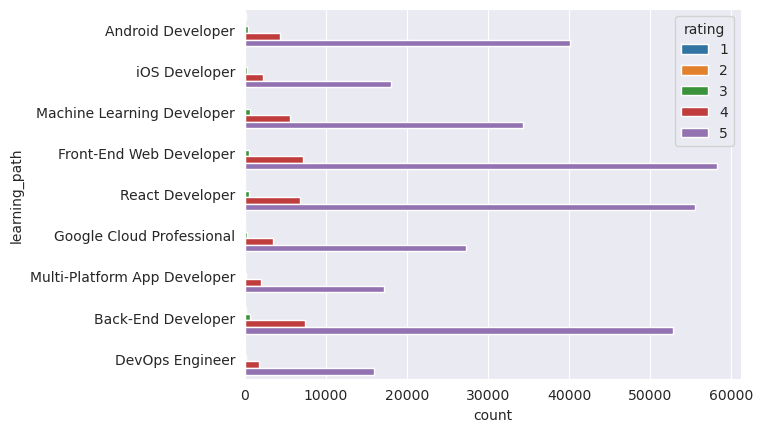

In [11]:
sns.countplot(data = data_complete, y = "learning_path", hue = "rating")

<Axes: xlabel='count', ylabel='learning_path'>

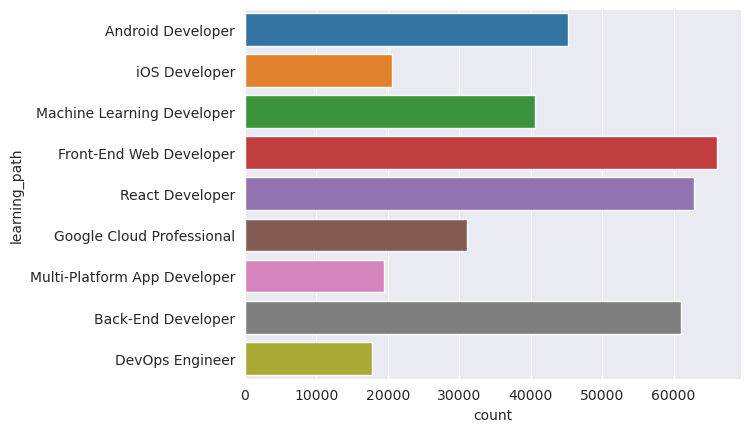

In [12]:
sns.countplot(data = data_complete, y = "learning_path")

clustering analysis

In [13]:
# Create a pandas DataFrame from the data
df = pd.DataFrame(data_complete)

# Pivot the DataFrame to create a user-learning path matrix
user_learning_path_matrix = df.pivot_table(index='user_id', columns='learning_path', values='course_id', aggfunc='count', fill_value=0)

# Display the user-learning path matrix
user_learning_path_matrix

learning_path,Android Developer,Back-End Developer,DevOps Engineer,Front-End Web Developer,Google Cloud Professional,Machine Learning Developer,Multi-Platform App Developer,React Developer,iOS Developer
user_id,,,,,,,,,
34,1,0,0,0,0,0,0,0,0
41,0,2,0,2,1,2,0,2,0
43,0,0,0,0,0,0,1,0,1
45,0,0,0,1,0,0,0,1,0
46,1,0,0,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
3270638,1,0,0,0,0,0,0,0,0
3270823,1,0,0,0,0,0,0,0,0
3272033,0,0,0,1,0,0,0,1,0


<Axes: xlabel='learning_path', ylabel='user_id'>

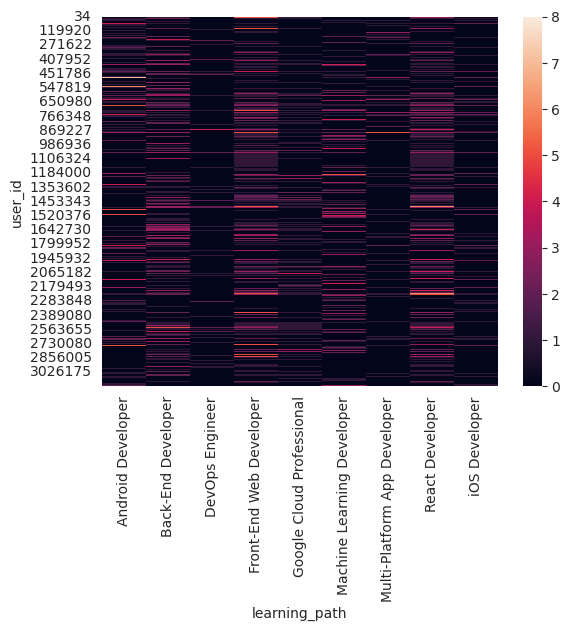

In [14]:
sns.heatmap(user_learning_path_matrix)

<Axes: xlabel='learning_path', ylabel='learning_path'>

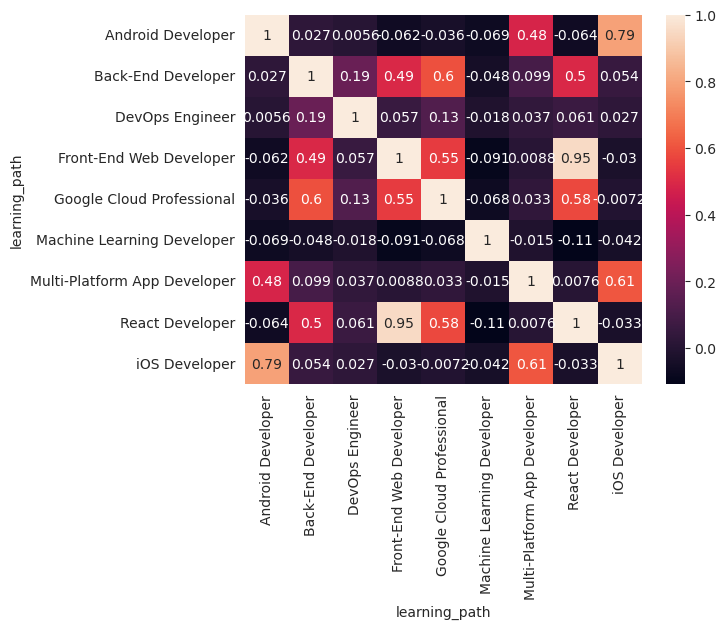

In [15]:
sns.heatmap(user_learning_path_matrix.corr(),annot=True)

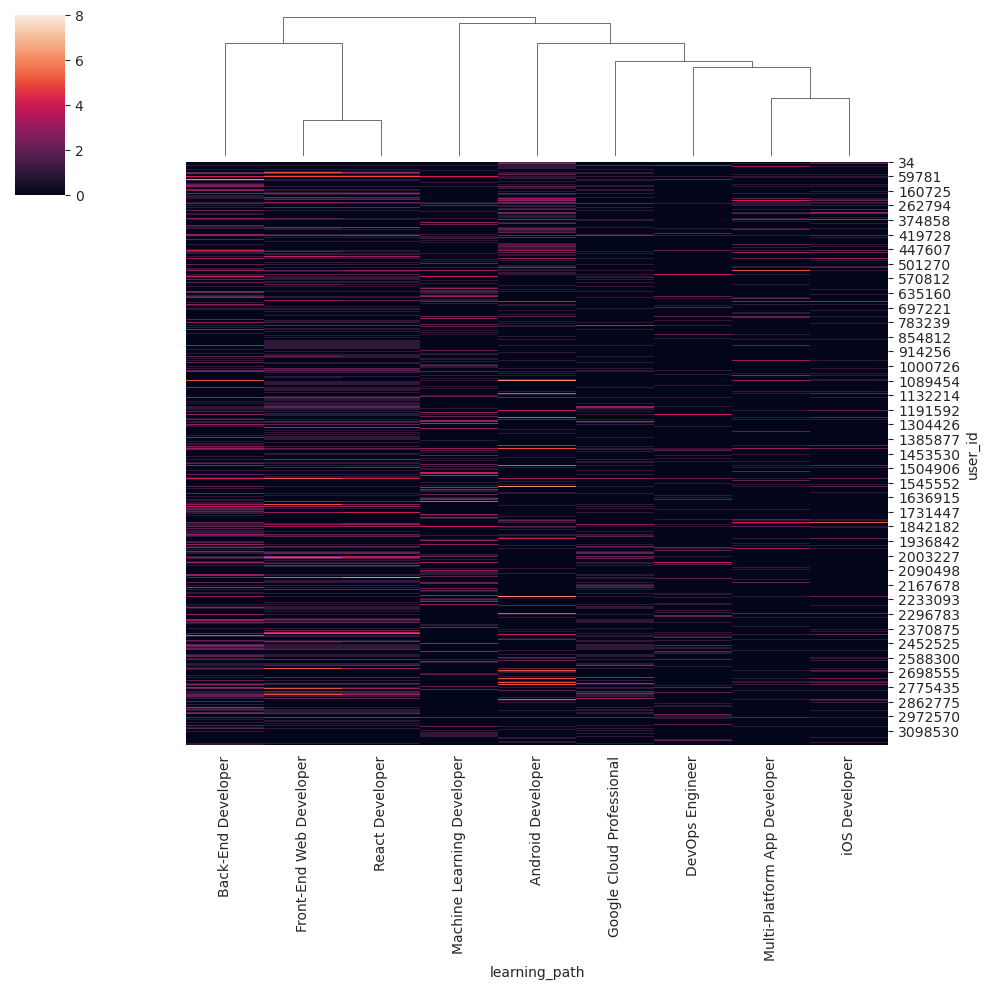

In [19]:
sns.clustermap(user_learning_path_matrix,row_cluster=False)

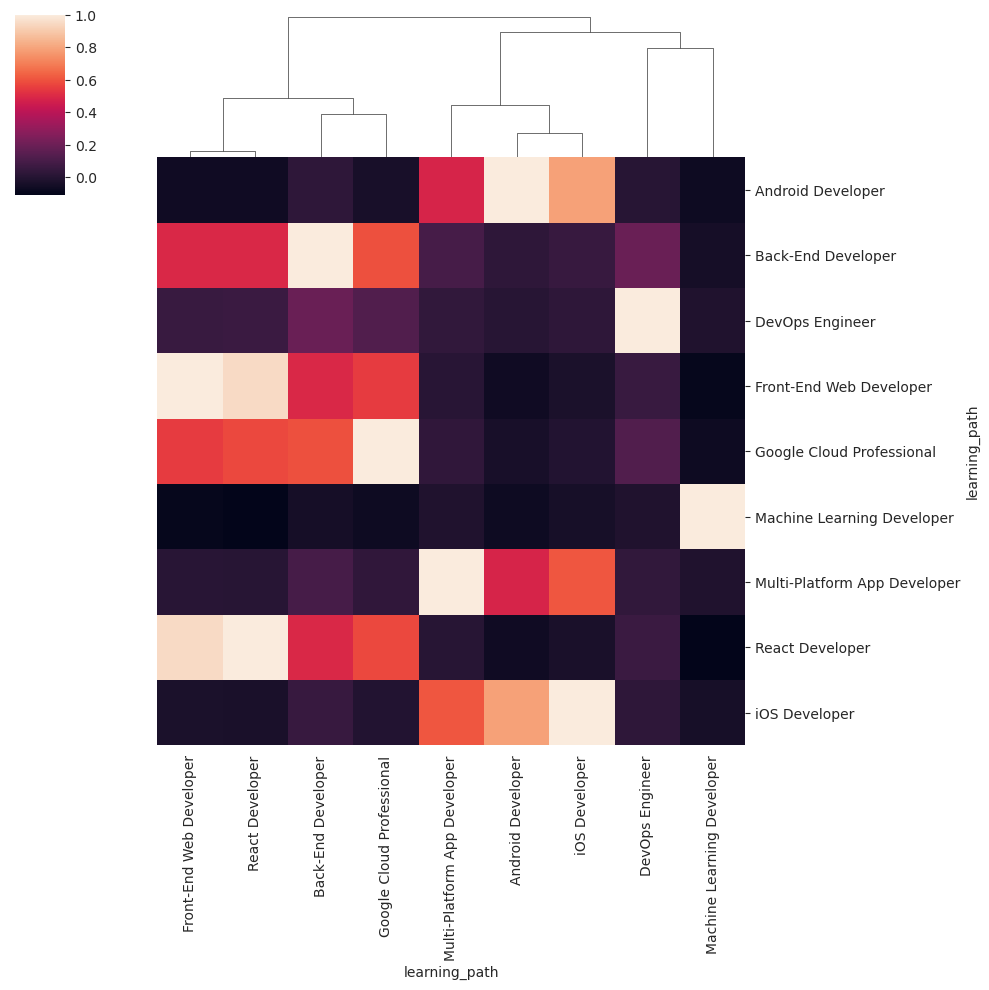

In [17]:
sns.clustermap(user_learning_path_matrix.corr(),row_cluster=False)